# Lab 2 - EDA Visualizations
### Jackson Rolando

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3

Here the clean(er) data from the last lab is loaded:


In [2]:
df_realEst = pd.read_csv('./clean_sacramento_real_estate.csv')
df_realEst.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


## 1: Regression on Price

Here we create scatter plots of the continuous variables against price. Zip code was ommitted, since there isn't much meaning in increasing zip codes or in their average. 

/tmp/ipykernel_6185/1318838926.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


<Figure size 1200x800 with 0 Axes>

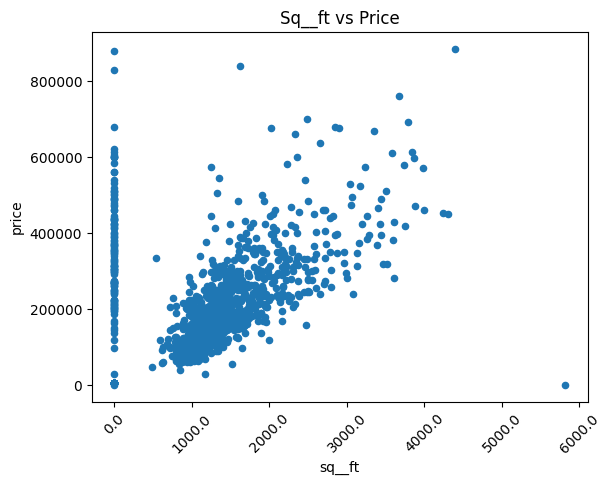

<Figure size 1200x800 with 0 Axes>

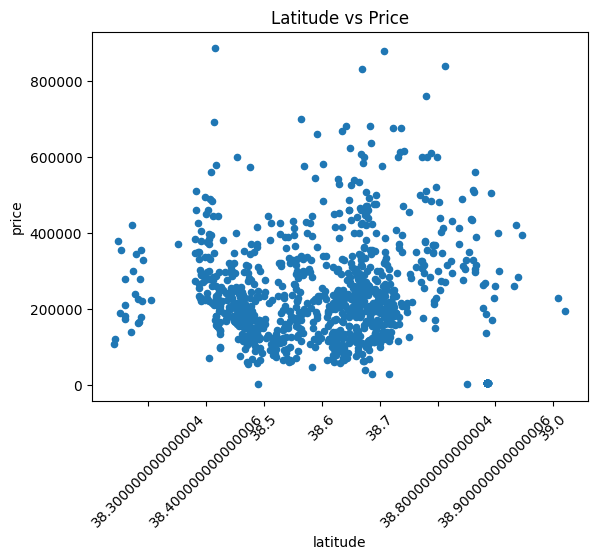

<Figure size 1200x800 with 0 Axes>

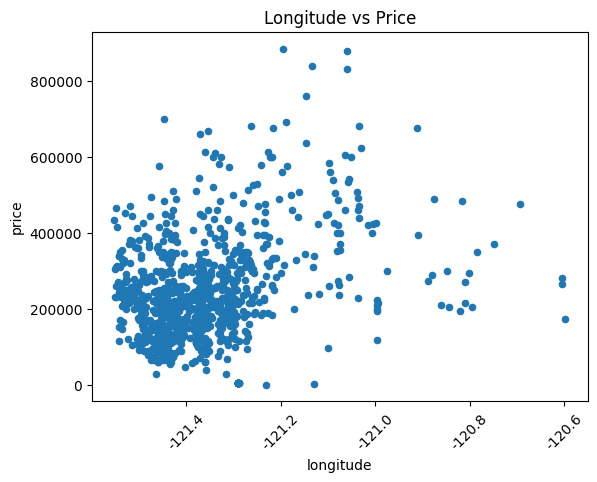

In [14]:
cont_cols = ['sq__ft', 'latitude', 'longitude']
for col in cont_cols:
    plt.figure(figsize=(12, 8))
    ax = df_realEst.plot.scatter(x=col, y='price')
    ax.set_title(col.capitalize() + ' vs Price')
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    plt.show()

It looks like square footage has the most obvious correlation with price.

Here's a table describing their ability to predict price:

| column    | predictive? | why?                                                                                            |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| sq_ft     | yes         | generally, as the square footage increases, so does the price                                   |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| latitude  | no          | while there are some groups, the  price doesn't increase or decrease  as the latitude increases |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| longitude | no          | same as latitude                                                                                |

Here are box plots for the categorical variables (including zip codes):

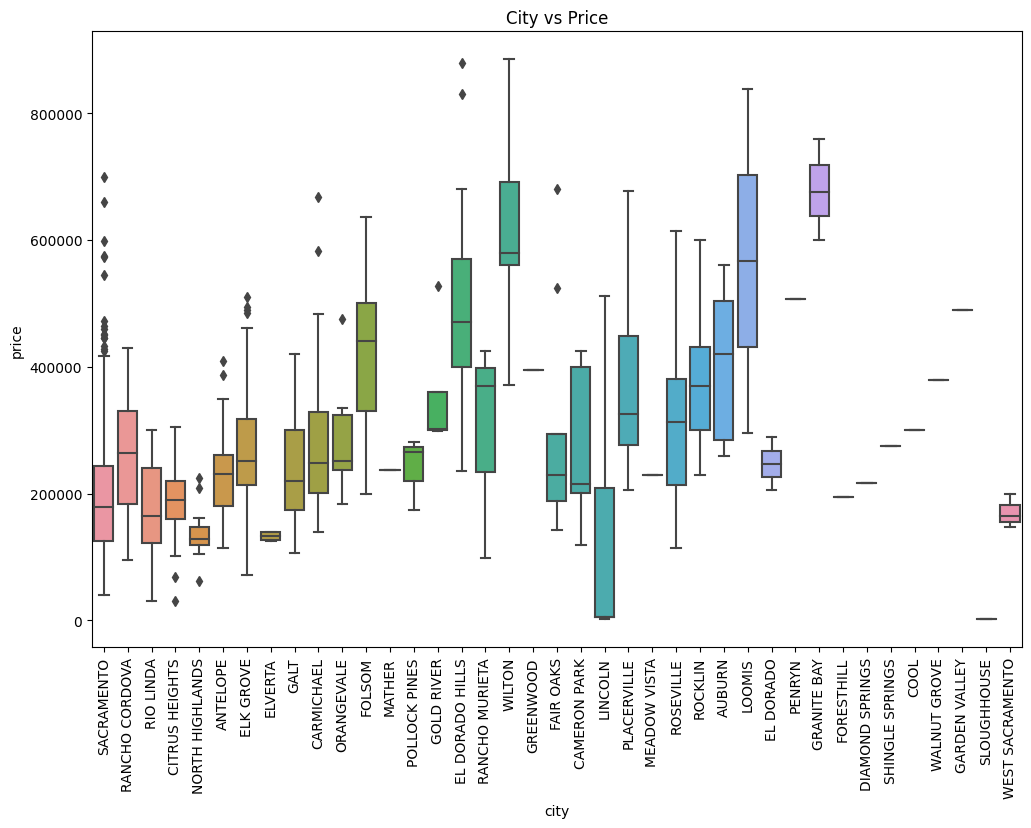

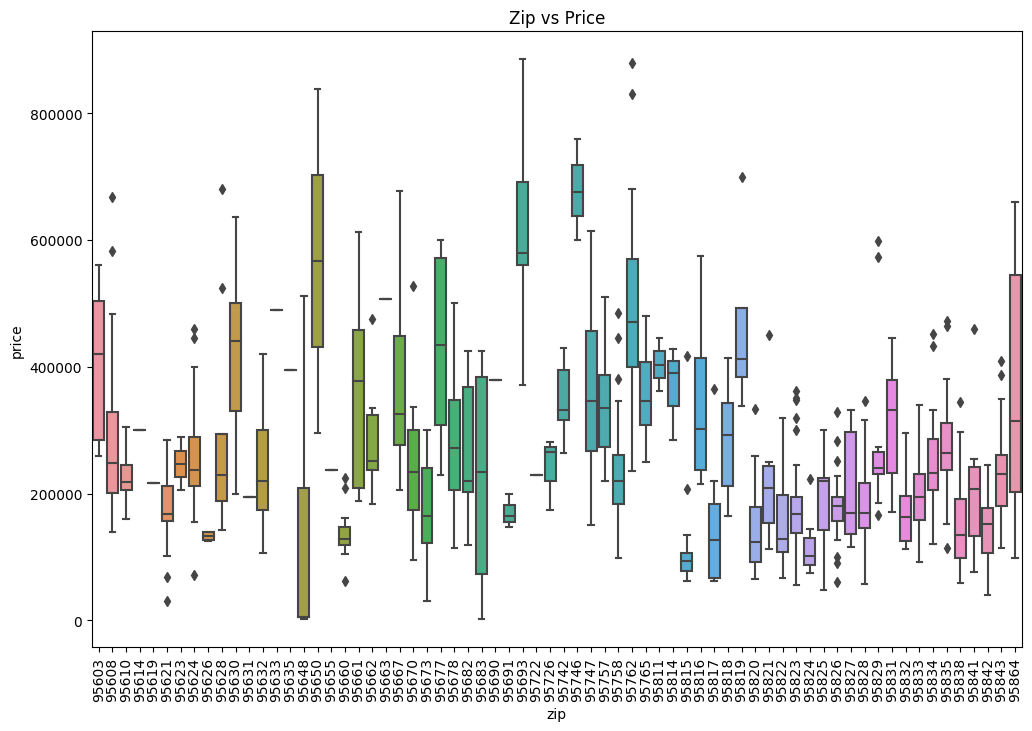

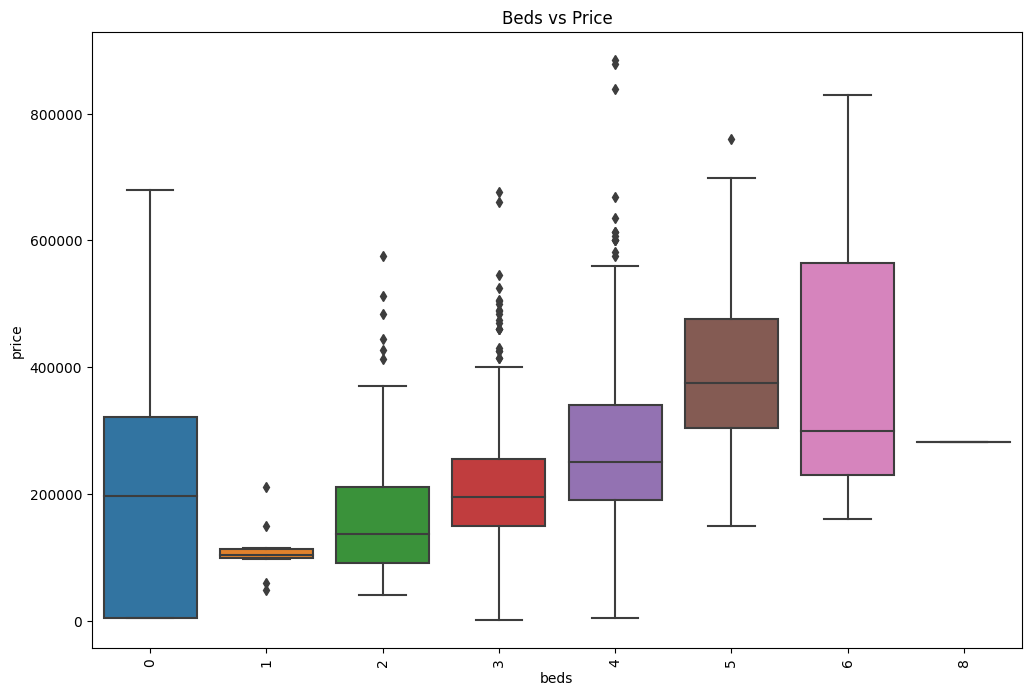

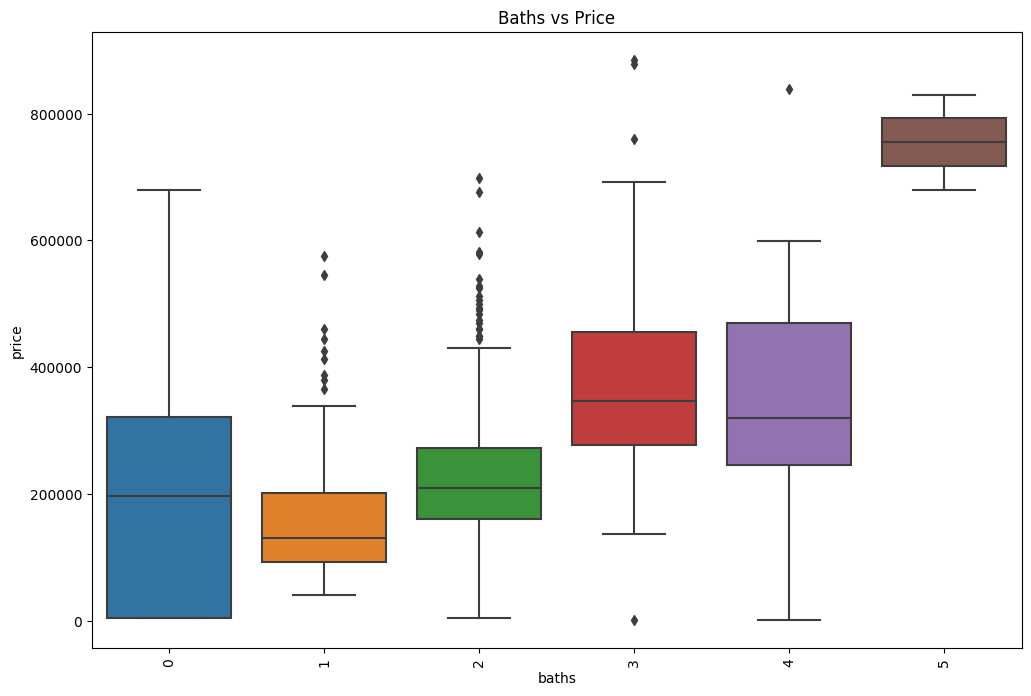

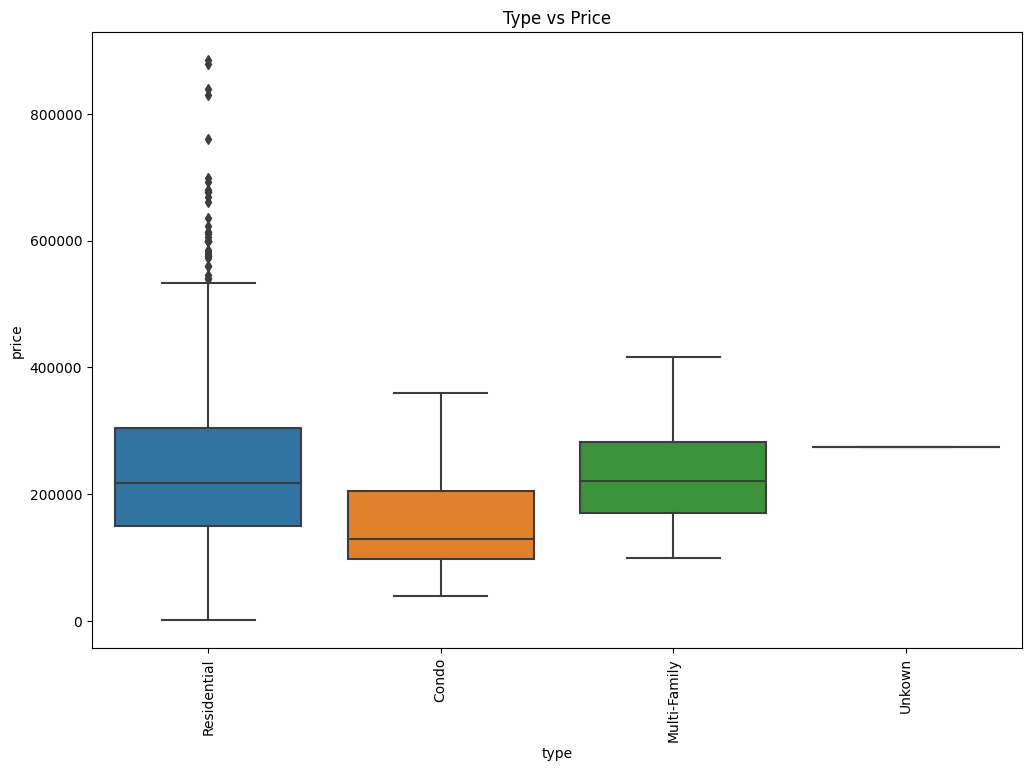

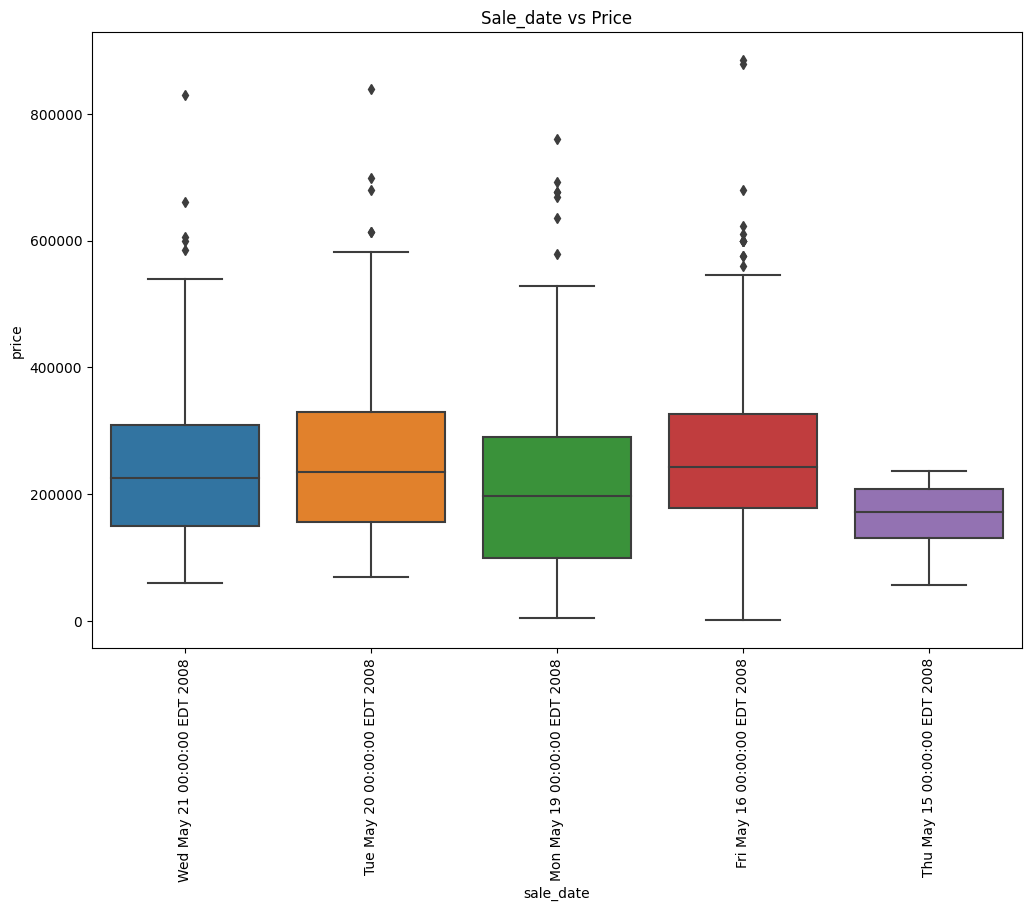

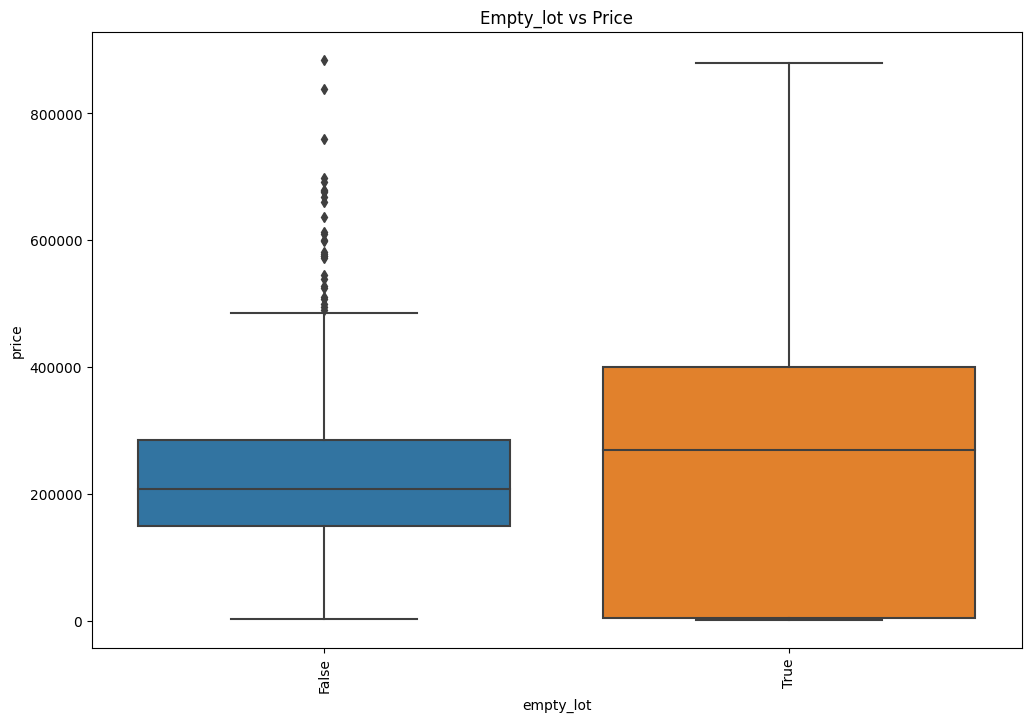

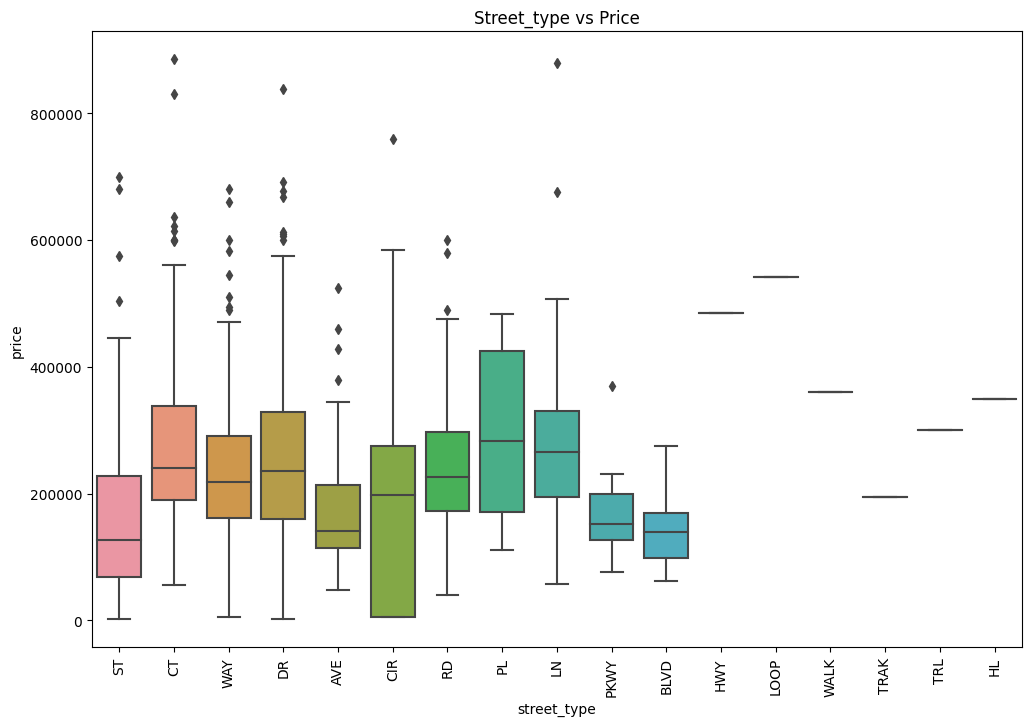

In [23]:
cat_cols = ['city', 'zip', 'beds', 'baths', 'type', 'sale_date', 'empty_lot', 'street_type']
for col in cat_cols:
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x=col, y='price', data=df_realEst)
    ax.set_title(col.capitalize() + " vs Price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

Here's a table describing their ability to predict price:

| column    | predictive? | why?                                                                                            |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| city     | yes         | For many cities, they have a very small distribution that doesn't overlap much with other cities, this could be useful. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| zip  | yes          | same as city |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| bed | yes          | This is the most obvious categorical variable with predictive qualities. As long as the number of beds isn't zero or six, it's pretty easy to draw some conclusion about where the price will fall based on the number of bedrooms. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| baths  | yes          | for 1, 2, 3, and 5 baths, there is also very clear separation of the prices between categories. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| type  | no          | a lot of overlap between most categories |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| sale date  | no          | a lot of overlap between most categories |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| empty lot  | no          | a lot of overlap between most categories |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| street type  | no          | a lot of overlap between most categories |

## 2: Classification on Property Type

Here are box plots of each regression variable as they compare to the property type:

/tmp/ipykernel_6185/3145545652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation = 90)


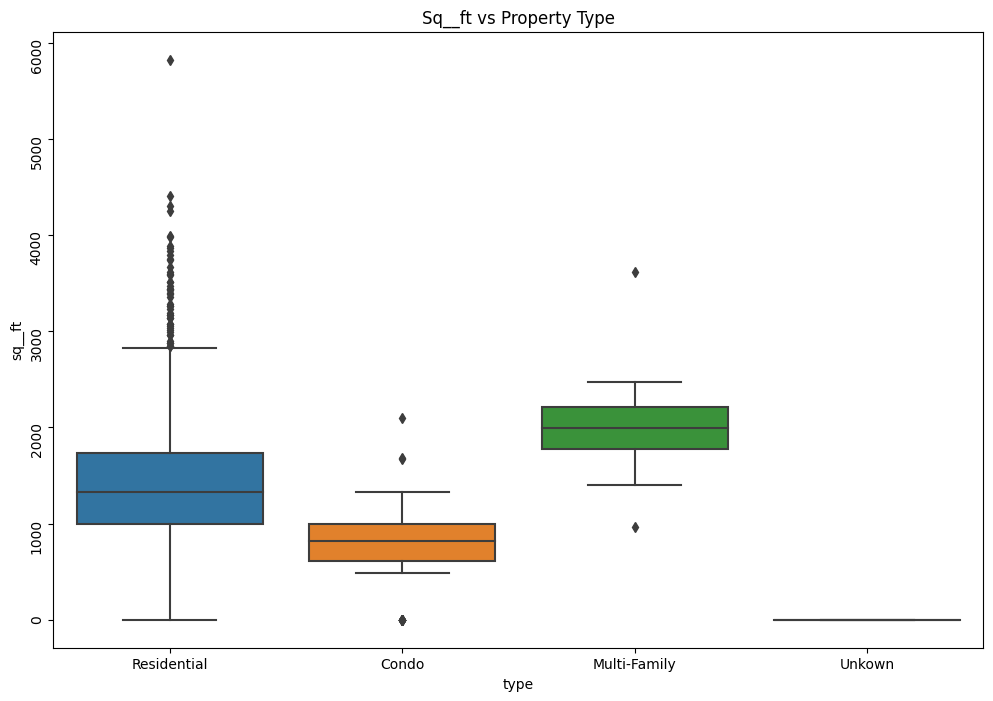

/tmp/ipykernel_6185/3145545652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation = 90)


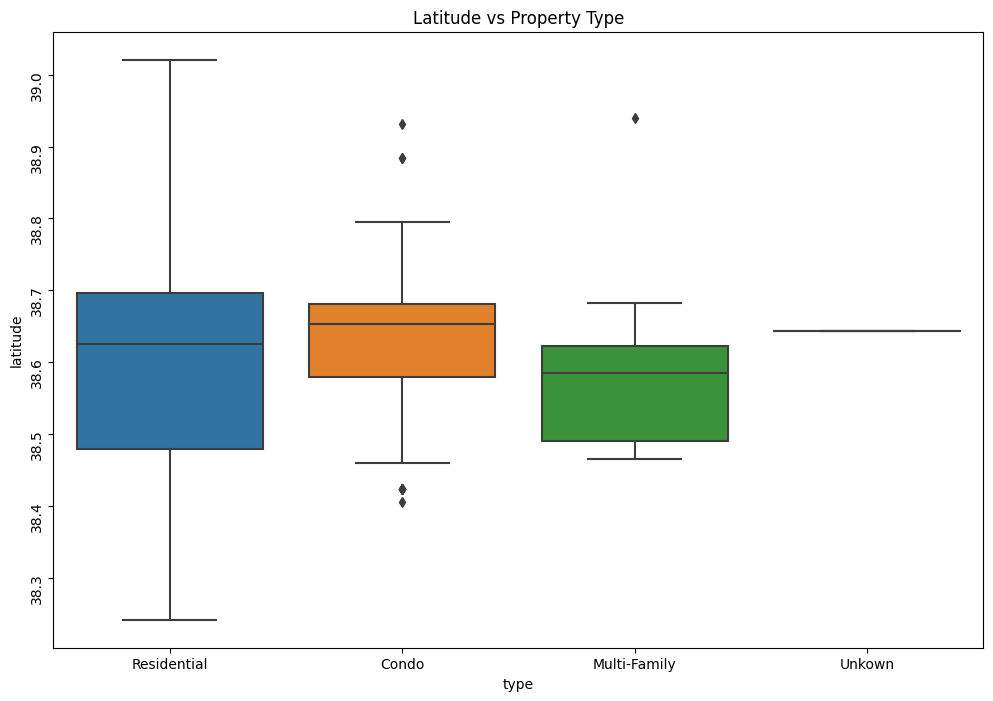

/tmp/ipykernel_6185/3145545652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation = 90)


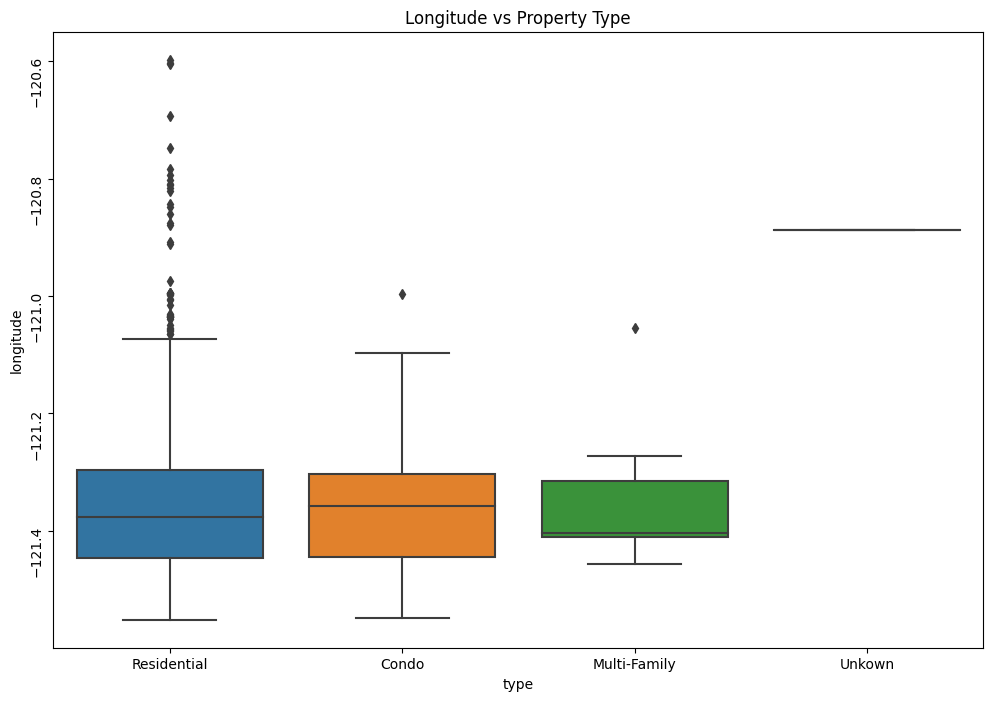

/tmp/ipykernel_6185/3145545652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation = 90)


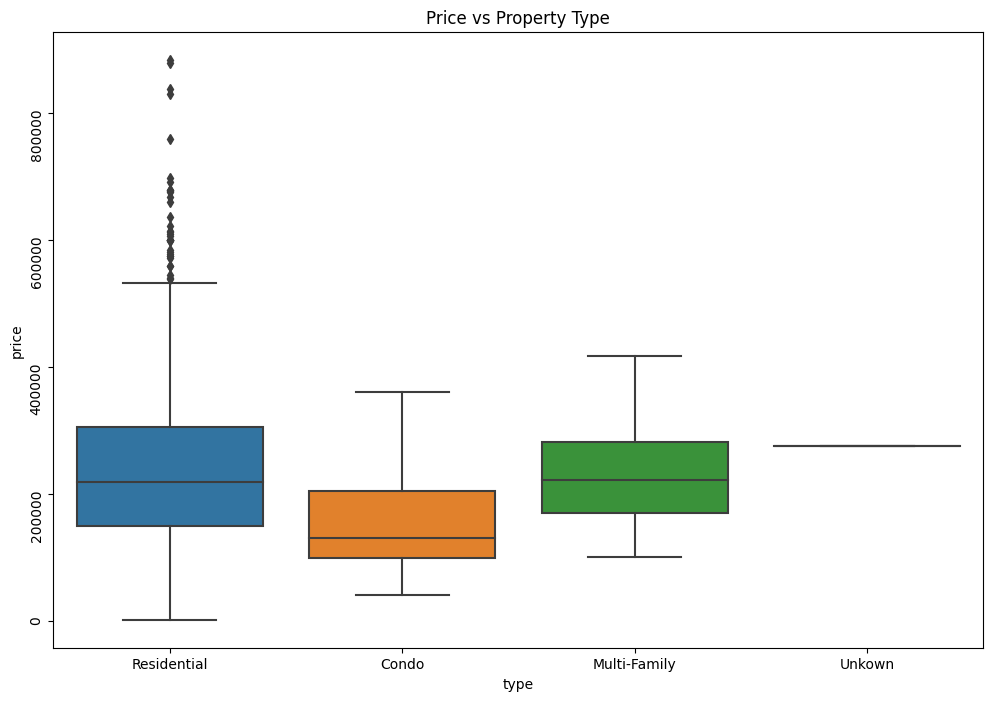

In [26]:
cont_cols = ['sq__ft', 'latitude', 'longitude', 'price']
for col in cont_cols:
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(y=col, x='type', data=df_realEst)
    ax.set_title(col.capitalize() + " vs Property Type")
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 90)
    plt.show()

Here's a table describing their ability to predict property type:

| column    | predictive? | why?                                                                                            |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| sq_ft     | yes         | This seems to break up the property types almost perfectly                              |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| latitude  | no          | All of the property types overlap significantly |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| longitude | no          | same as latitude                                                                                |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| price | no          | same as latitude                                                                                |

Here is a heat map of each categorical variable as they compare to property type:

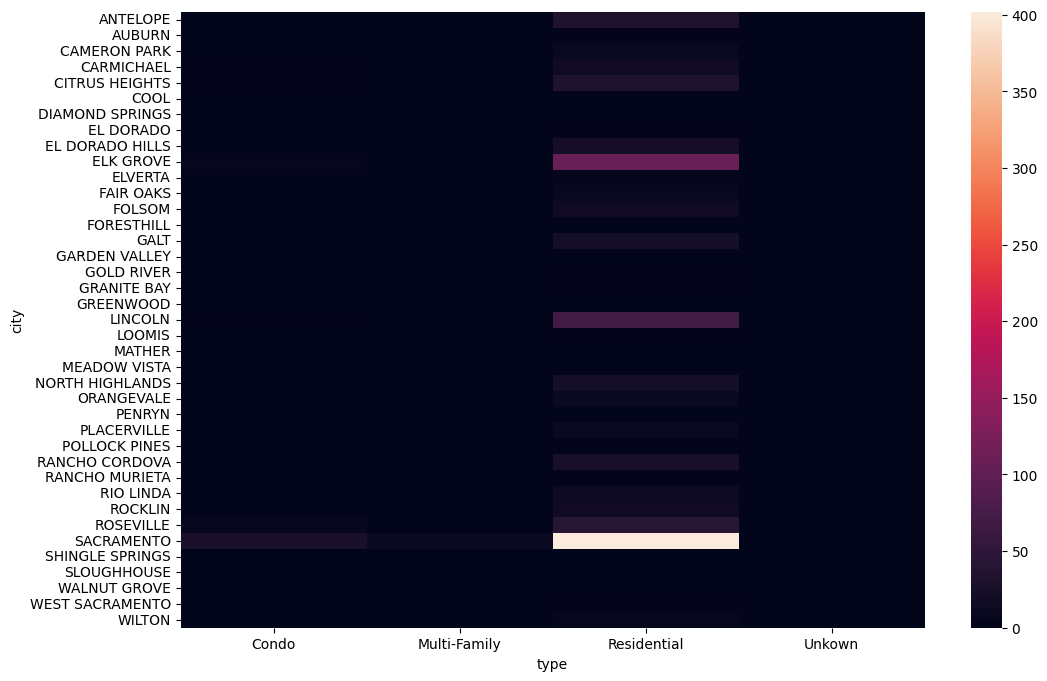

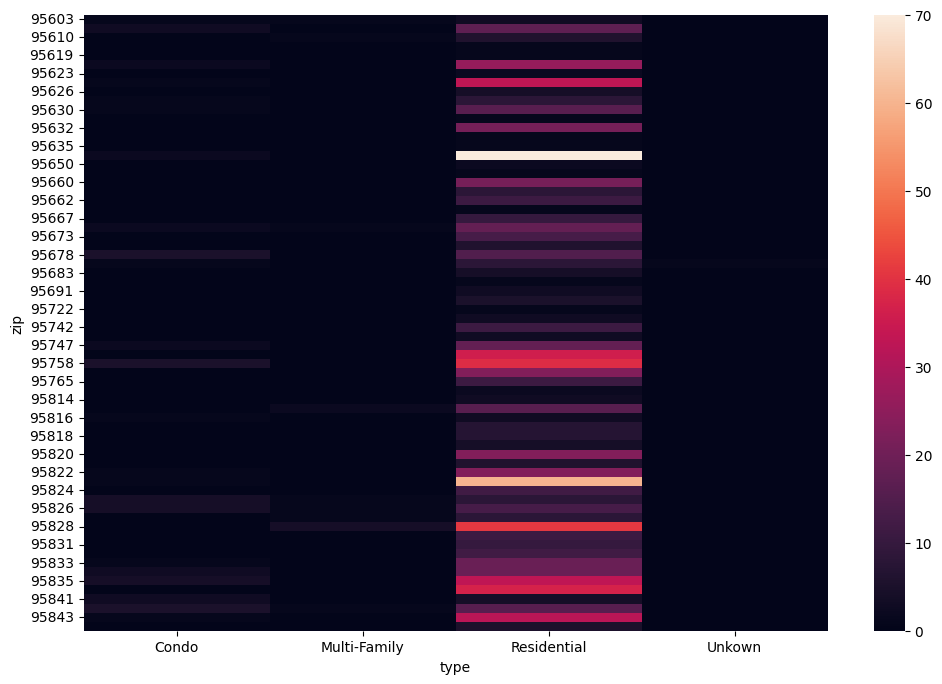

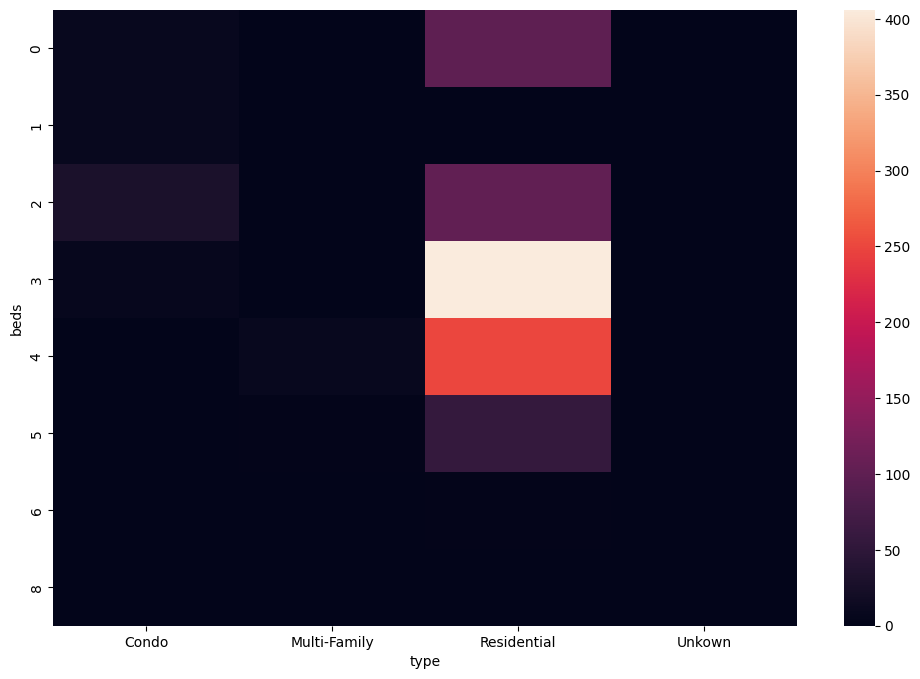

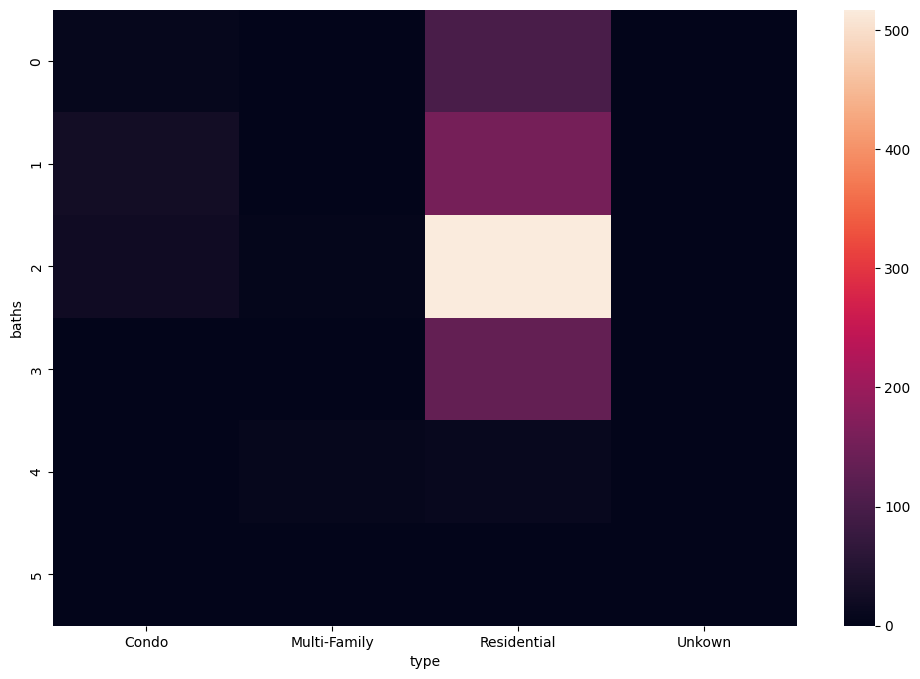

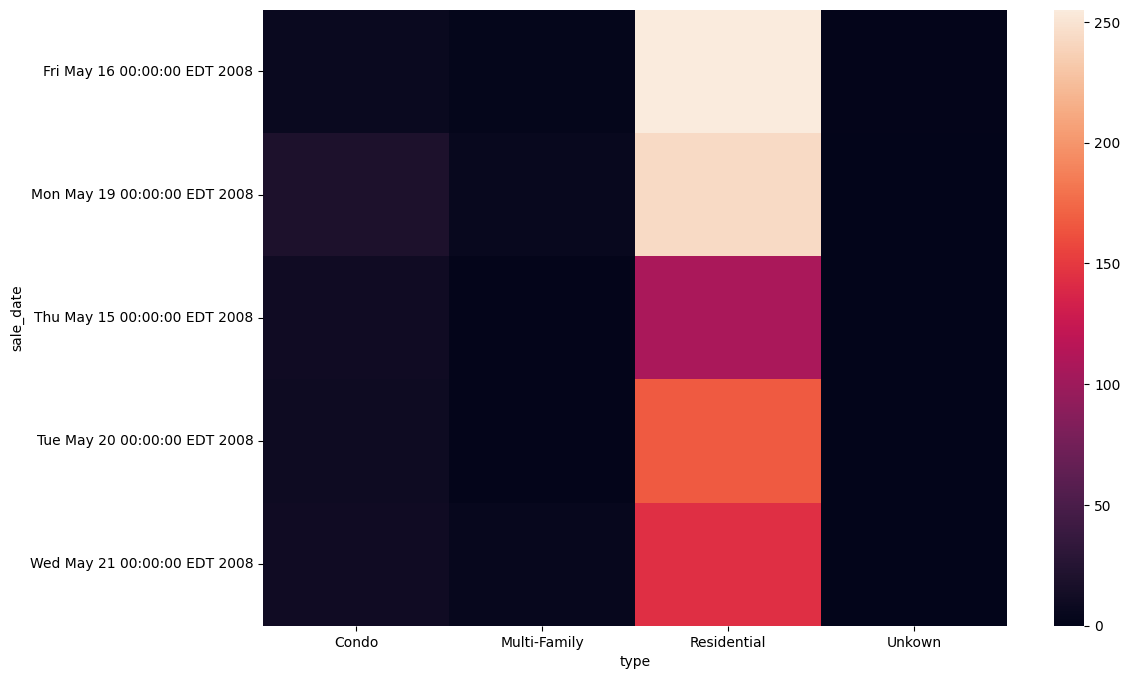

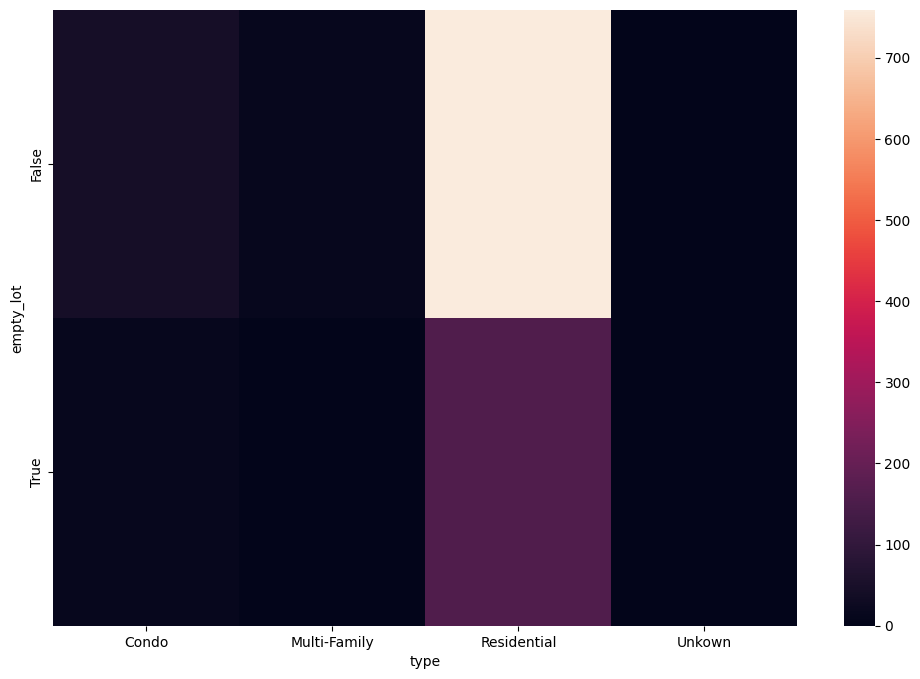

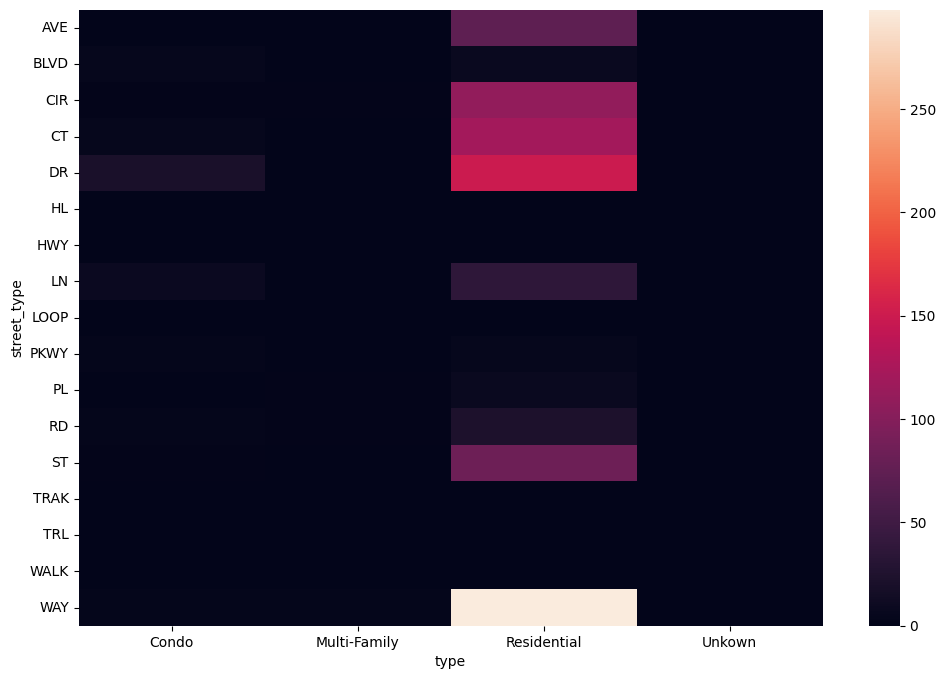

In [29]:
cat_cols = ['city', 'zip', 'beds', 'baths', 'sale_date', 'empty_lot', 'street_type']
for col in cat_cols:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_realEst.value_counts(subset=["type", col]).unstack(level=0).fillna(0))
    ax.set_title(col.capitalize() + " vs Price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

Here's a table describing their ability to predict property type:

| column    | predictive? | why?                                                                                            |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| city     | no         | obviously sacramento is the most common city, regardless of the type of property |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| zip  | no          | same as city |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| bed | sort of          | There are a couple of very clear clategories that light up for residential, where the rest of the categories don't occur very often in the residential category. This could just mean that the number of beds didn't occur very often. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| baths  | sort of          | many of the possible values light up for residential, though there is a clear winner, so it could be used. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| sale date  | no          | all of the categories light up for the residential type |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| empty lot  | no          | both categories light up for the residential type |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| street type  | no          | Many of the different categories light up for the residential type |

None of the categorical variables would be super useful for determining the type of property. If anything, these graphs just highlight what configurations are most likely to occur in a residential setting, since it's the only type that has any significant occurances in any category. Differentiation between the different property types is a lost cause with these heat maps given the disproportion of the amount of data for residential types vs other types. If anything, one could *possibly* use these categorical variables to determine whether a property is residential or not, nothing more granular. 

## 3: Compare Predictive Variables

> note: I hesitate to label beds or paths as predictive for property type, but they were the most predictive out of all of the categories. Overall, more data is needed for non-residential properties to make clearer distinctions

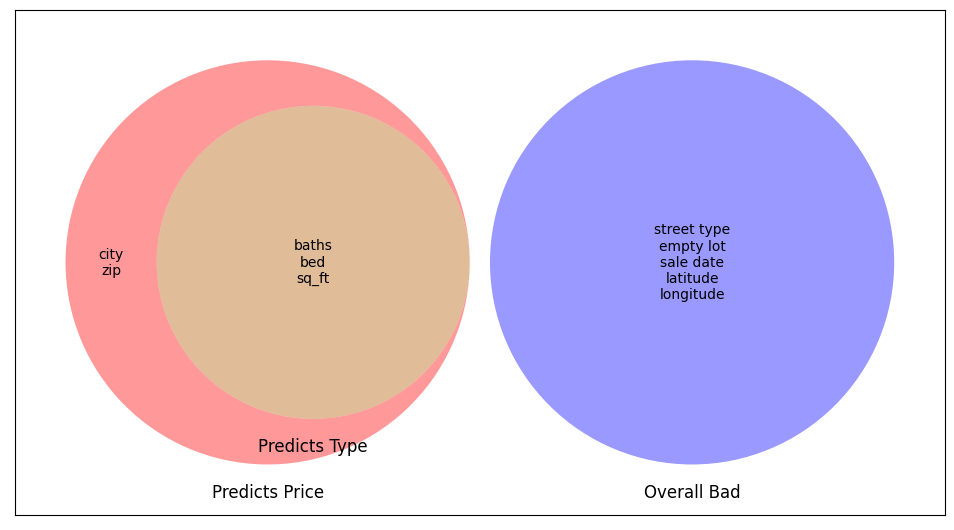

In [35]:
fig = plt.figure(figsize=(12, 8))
price = set(['sq_ft', 'city', 'zip', 'bed', 'baths'])
types = set(['sq_ft', 'bed', 'baths'])
neither = set(['latitude', 'longitude', 'sale date', 'empty lot', 'street type'])

v = venn3([price, types, neither], ('Predicts Price', 'Predicts Type', 'Overall Bad'))

v.get_label_by_id('100').set_text('\n'.join(map(str,price-types)))
v.get_label_by_id('110').set_text('\n'.join(map(str,price&types)))
v.get_label_by_id('001').set_text('\n'.join(map(str, neither)))
plt.axis('on')
plt.show()

The number of beds, number of baths, and square footage are good(ish) predictors for both property type and price.

For good predictors:

| column    | predictive for | why?                                                                                            |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| sq_ft     | both         | This is one of the most basic attributes of a house. If you take two properties of the same type in the same place, the one with more square footage is bigger, and will be the more expensive property unless there are other odd factors at play (murder). It is also a good indicator of property type, as condos are usually smaller than normal residential houses, which are usually smaller than multi-family homes. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| beds  | both          | This is similar to square footage, as it is also a basic, easily quantifyable attribute of a house. I'd say this is slightly less important than square footage, but still very much influences the price and can be representative of property type in a similar way as well. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| baths  | both          | Same as bedrooms |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| city  | price          | Neighborhood can drastically affect price. How safe a neighborhood is, what the schools are like, and the sorts of recreational options nearby often correlate to property value. |
|-----------|-------------|-------------------------------------------------------------------------------------------------|
| zip | price          | This is a more granular metric for location than city, but the effect is similar. |